
# Credit Card Fraud Detection
# Pipeline:
# 1. Import libraries
# 2. Load dataset and info
# 3. EDA
# 4. Preprocessing
# 5. Model training and validation
# 6. Results explanation & business expectations
# 7. Limitations and future improvements


# 1) IMPORT LIBRARIES

In [1]:
import warnings
warnings.filterwarnings('ignore')


# Data
import numpy as np
import pandas as pd


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing & model selection
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
classification_report, confusion_matrix, roc_auc_score,
average_precision_score, precision_recall_curve, roc_curve
)


# Imbalance handling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb


# Deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Utilities
import joblib
from pathlib import Path


# Set display
pd.set_option('display.max_columns', None)

# 2) LOAD DATASET AND BASIC INFO

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [3]:
# Load data
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

print('Dataset shape:', df.shape)
print('\nColumns:')
print(df.columns.tolist())


print('\nSample rows:')
df.head()

Dataset shape: (284807, 31)

Columns:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Sample rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Quick info
print('\nMissing values per column:')
print(df.isnull().sum().sum())


print('\nClass distribution:')
print(df['Class'].value_counts(dropna=False))


print("\n" + "="*50)
print("Statistical Summary:")
df.describe()


Missing values per column:
0

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Statistical Summary:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Insight:
# - The dataset contains 284,807 transactions with highly imbalanced classes (fraud ~0.172%).
# - V1..V28 are PCA components (anonymized), Time and Amount are raw features.
# - Because of imbalance, traditional accuracy is misleading — we focus on PR-AUC & precision/recall.

# 3) EDA


In [5]:
# Basic statistics for Amount and Time
print('Amount summary:')
print(df['Amount'].describe())


print('\nTime summary:')
print(df['Time'].describe())

Amount summary:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Time summary:
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64


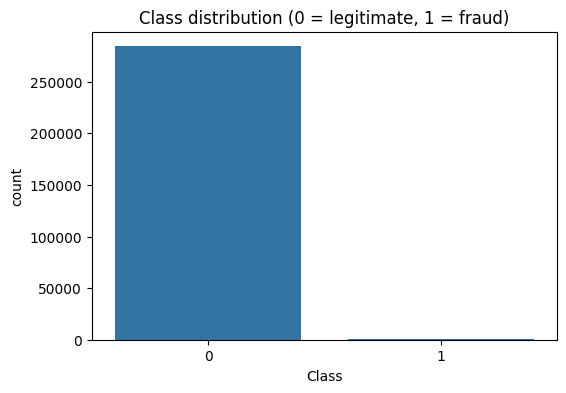

In [6]:
# Plot class imbalance
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class distribution (0 = legitimate, 1 = fraud)')
plt.show()

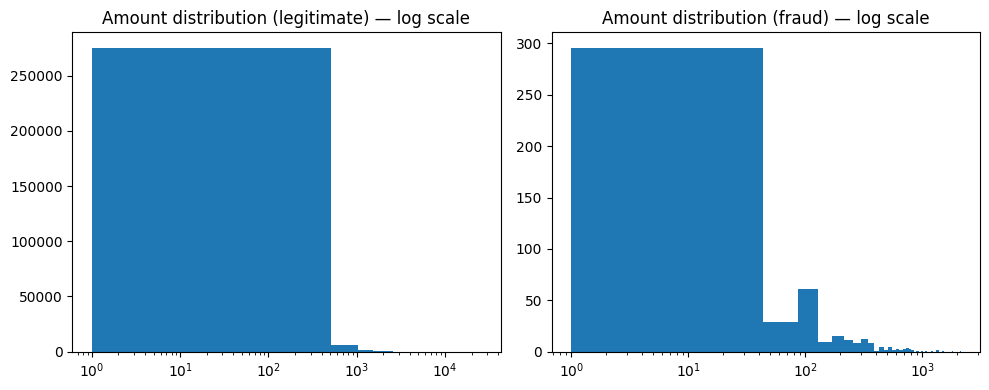

In [7]:
# Distribution of Amount (log) for both classes — useful to see heavy tails
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df[df['Class']==0]['Amount'] + 1, bins=50)
plt.xscale('log')
plt.title('Amount distribution (legitimate) — log scale')


plt.subplot(1,2,2)
plt.hist(df[df['Class']==1]['Amount'] + 1, bins=50)
plt.xscale('log')
plt.title('Amount distribution (fraud) — log scale')
plt.tight_layout()
plt.show()

# Insight: fraud transactions tend to appear across amounts; heavy-tail present in both classes.

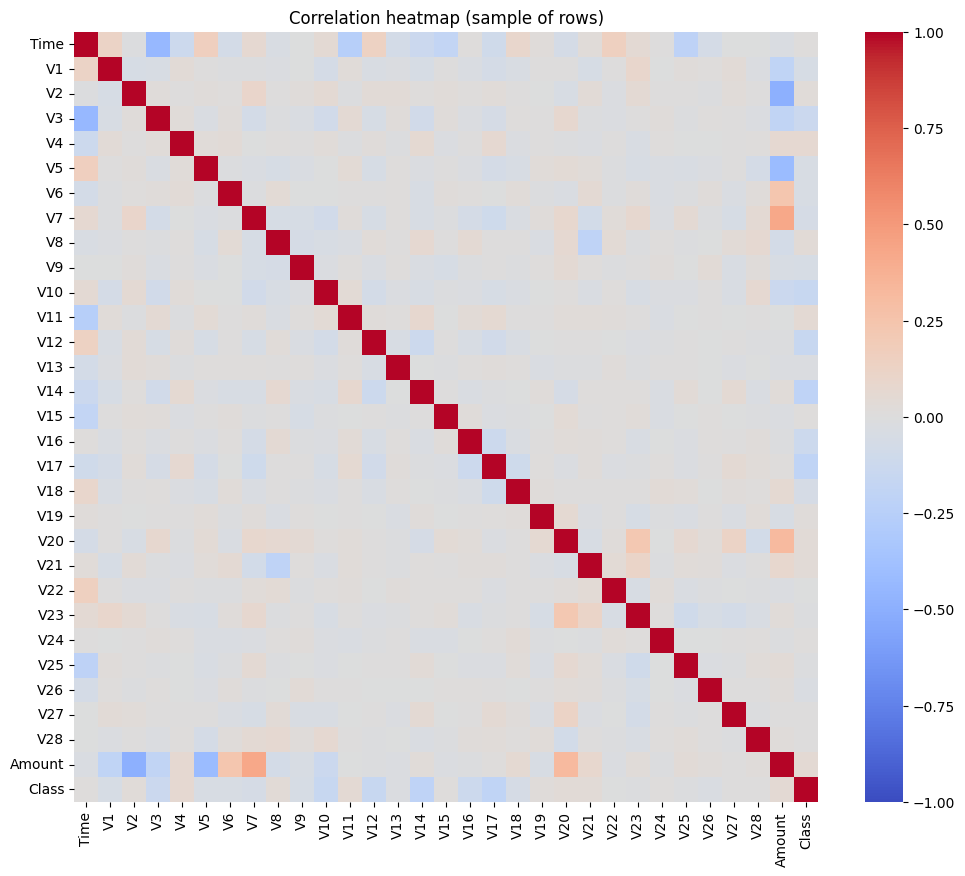

In [8]:
# Correlation heatmap (notice: V1..V28 are orthogonal-ish from PCA, but checking quick correlations)
plt.figure(figsize=(12,10))
corr = df.sample(5000, random_state=1).corr()
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation heatmap (sample of rows)')
plt.show()

# 4) PREPROCESSING
# Steps:
# - Split features/target
# - Stratified train-test split
# - Scale features


In [9]:
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale only TIME and AMOUNT
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test_scaled[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)


In [10]:
print("Before SMOTE:", np.bincount(y_train))

sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_scaled_df, y_train)

print("After SMOTE:", np.bincount(y_train_smote))

Before SMOTE: [227451    394]
After SMOTE: [227451 227451]


In [11]:
# Save scaler for later
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [12]:
train_smote_excel = pd.concat([X_train_smote, y_train_smote], axis=1)
train_smote_excel.to_excel("train_smote_dataset.xlsx", index=False)

print("Exported: train_smote_dataset.xlsx")

Exported: train_smote_dataset.xlsx


# 5) MODEL TRAINING & VALIDATION


In [13]:
# Helper evaluation function
from sklearn.metrics import precision_score, recall_score, f1_score


def evaluate_model(name, y_true, y_proba, threshold=0.5):
  y_pred = (y_proba >= threshold).astype(int)
  cm = confusion_matrix(y_true, y_pred)
  report = classification_report(y_true, y_pred, digits=4)
  roc = roc_auc_score(y_true, y_proba)
  pr = average_precision_score(y_true, y_proba)
  tp = int(cm[1,1]); fp = int(cm[0,1]); fn = int(cm[1,0]); tn = int(cm[0,0])
  return {
  'model': name,
  'threshold': threshold,
  'precision': precision_score(y_true, y_pred, zero_division=0),
  'recall': recall_score(y_true, y_pred),
  'f1': f1_score(y_true, y_pred),
  'roc_auc': roc,
  'pr_auc': pr,
  'tp': tp, 'fp': fp, 'fn': fn, 'tn': tn,
  'confusion_matrix': cm,
  'classification_report': report
  }


results = []

# -----------------------------
# 5A) Logistic Regression on SMOTE data
# -----------------------------

In [14]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_smote, y_train_smote)

pred_proba = log_reg.predict_proba(X_test_scaled_df)[:, 1]

# Find best threshold
from sklearn.metrics import precision_recall_curve

prec, rec, thresh = precision_recall_curve(y_test, pred_proba)

f1 = 2 * (prec * rec) / (prec + rec + 1e-6)
best_idx = np.argmax(f1)
best_threshold = thresh[best_idx]

print("Best threshold:", best_threshold)

# Apply threshold
pred_opt = (pred_proba >= best_threshold).astype(int)

print(classification_report(y_test, pred_opt))
print(confusion_matrix(y_test, pred_opt))
print("ROC-AUC:", roc_auc_score(y_test, pred_proba))
print("PR-AUC:", average_precision_score(y_test, pred_proba))


Best threshold: 0.9999999906914586
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

[[56848    16]
 [   18    80]]
ROC-AUC: 0.9698631105509169
PR-AUC: 0.7249139606556327


# -----------------------------
# 5B) Random Forest on original (class_weight)
# -----------------------------

In [15]:
rf = RandomForestClassifier(n_estimators=200, max_depth=12, class_weight='balanced_subsample', random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)


y_scores_rf = rf.predict_proba(X_test)[:,1]
prec, rec, thresh = precision_recall_curve(y_test, y_scores_rf)
f1s = 2 * (prec * rec) / (prec + rec + 1e-9)
best_idx = np.argmax(f1s)
best_thresh_rf = thresh[best_idx]
res_rf = evaluate_model('RandomForest', y_test, y_scores_rf, threshold=best_thresh_rf)
results.append(res_rf)
print('RF best threshold:', best_thresh_rf)
print(res_rf['classification_report'])


# Feature importance (top 10)
fi = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_}).sort_values('importance', ascending=False)
fi.head(10).to_csv('rf_feature_importance.csv', index=False)

RF best threshold: 0.5141780670366501
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8421    0.8163    0.8290        98

    accuracy                         0.9994     56962
   macro avg     0.9209    0.9080    0.9144     56962
weighted avg     0.9994    0.9994    0.9994     56962





# -----------------------------
# 5C) LightGBM on original (class_weight)
# -----------------------------

In [16]:
lgbm = lgb.LGBMClassifier(n_estimators=400, learning_rate=0.05, num_leaves=64, class_weight='balanced', random_state=42, n_jobs=-1)
lgbm.fit(X_train, y_train)


y_scores_lgb = lgbm.predict_proba(X_test)[:,1]
prec, rec, thresh = precision_recall_curve(y_test, y_scores_lgb)
f1s = 2 * (prec * rec) / (prec + rec + 1e-9)
best_idx = np.argmax(f1s)
best_thresh_lgb = thresh[best_idx]
res_lgb = evaluate_model('LightGBM', y_test, y_scores_lgb, threshold=best_thresh_lgb)
results.append(res_lgb)
print('LGB best threshold:', best_thresh_lgb)
print(res_lgb['classification_report'])

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

# -----------------------------
# 5D) Deep Learning — two MLPs trained on SMOTE data
# -----------------------------

In [17]:
# Prepare DL data
X_train_smote_arr = X_train_smote.values.astype('float32') if hasattr(X_train_smote, 'values') else np.array(X_train_smote, dtype='float32')
y_train_smote_arr = y_train_smote.values.astype('float32') if hasattr(y_train_smote, 'values') else np.array(y_train_smote, dtype='float32')
X_test_arr = X_test_scaled_df.values.astype('float32')


def build_mlp(input_dim, layers_units=[64,32], dropout=0.2):
  inp = keras.Input(shape=(input_dim,))
  x = inp
  for u in layers_units:
    x = layers.Dense(u, activation='relu')(x)
    x = layers.Dropout(dropout)(x)
  out = layers.Dense(1, activation='sigmoid')(x)
  model = keras.Model(inputs=inp, outputs=out)
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[keras.metrics.AUC(name='roc_auc')])
  return model

In [18]:
# Shallow MLP
shallow = build_mlp(X_train_smote_arr.shape[1], layers_units=[64,32], dropout=0.2)
shallow.fit(X_train_smote_arr, y_train_smote_arr, epochs=8, batch_size=2048, validation_split=0.1, verbose=1)
y_scores_shallow = shallow.predict(X_test_arr).ravel()
prec, rec, thresh = precision_recall_curve(y_test, y_scores_shallow)
f1s = 2 * (prec * rec) / (prec + rec + 1e-9)
best_idx = np.argmax(f1s)
best_thresh_shallow = thresh[best_idx]
res_shallow = evaluate_model('MLP_shallow', y_test, y_scores_shallow, threshold=best_thresh_shallow)
results.append(res_shallow)
print('Shallow MLP best thresh:', best_thresh_shallow)
print(res_shallow['classification_report'])

Epoch 1/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5905 - roc_auc: 0.8213 - val_loss: 0.1107 - val_roc_auc: 0.0000e+00
Epoch 2/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0843 - roc_auc: 0.9952 - val_loss: 0.0576 - val_roc_auc: 0.0000e+00
Epoch 3/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0538 - roc_auc: 0.9983 - val_loss: 0.0335 - val_roc_auc: 0.0000e+00
Epoch 4/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0394 - roc_auc: 0.9990 - val_loss: 0.0234 - val_roc_auc: 0.0000e+00
Epoch 5/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0308 - roc_auc: 0.9993 - val_loss: 0.0142 - val_roc_auc: 0.0000e+00
Epoch 6/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0237 - roc_auc: 0.9995 - val_loss: 0.0100 - val_roc_auc: 0.0000e+00
Epoch 7/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190 - roc_auc: 0.9995 - val_loss: 0.0069 - val_roc_auc: 0.0000e+00
Epoch 8/8
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0156 - roc_auc: 0.9997 - val_loss: 0

In [19]:
# Deep MLP
deep = build_mlp(X_train_smote_arr.shape[1], layers_units=[256,128,64,32], dropout=0.3)
deep.fit(X_train_smote_arr, y_train_smote_arr, epochs=10, batch_size=2048, validation_split=0.1, verbose=1)
y_scores_deep = deep.predict(X_test_arr).ravel()
prec, rec, thresh = precision_recall_curve(y_test, y_scores_deep)
f1s = 2 * (prec * rec) / (prec + rec + 1e-9)
best_idx = np.argmax(f1s)
best_thresh_deep = thresh[best_idx]
res_deep = evaluate_model('MLP_deep', y_test, y_scores_deep, threshold=best_thresh_deep)
results.append(res_deep)
print('Deep MLP best thresh:', best_thresh_deep)
print(res_deep['classification_report'])

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.2277 - roc_auc: 0.9585 - val_loss: 0.0187 - val_roc_auc: 0.0000e+00
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0287 - roc_auc: 0.9993 - val_loss: 0.0028 - val_roc_auc: 0.0000e+00
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0125 - roc_auc: 0.9996 - val_loss: 0.0011 - val_roc_auc: 0.0000e+00
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0079 - roc_auc: 0.9998 - val_loss: 8.4000e-04 - val_roc_auc: 0.0000e+00
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0062 - roc_auc: 0.9998 - val_loss: 0.0020 - val_roc_auc: 0.0000e+00
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0050 - roc_auc: 0.9998 - val_loss: 5.7846e-04 - val_roc_auc: 0.0000e+00
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0041 - roc_auc: 0.9998 - val_loss: 3.4036e-04 - val_roc_auc: 0.0000e+00
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0040 - r

# -----------------------------
# 6) RESULTS COMPARISON
# -----------------------------

In [20]:
results_df = pd.DataFrame(results)
results_df = results_df[['model','threshold','precision','recall','f1','roc_auc','pr_auc','tp','fp','fn','tn']]
results_df.to_csv('model_comparison_summary.csv', index=False)
print('Saved model_comparison_summary.csv')

Saved model_comparison_summary.csv


In [21]:
# Display table
results_df

,model,threshold,precision,recall,f1,roc_auc,pr_auc,tp,fp,fn,tn
0,RandomForest,0.514178,0.842105,0.816327,0.829016,0.976812,0.837219,80,15,18,56849
1,LightGBM,0.915943,0.941860,0.826531,0.880435,0.975881,0.882431,81,5,17,56859
2,MLP_shallow,0.996935,0.803922,0.836735,0.820000,0.980577,0.805006,82,20,16,56844
3,MLP_deep,0.998772,0.914634,0.765306,0.833333,0.971143,0.850653,75,7,23,56857


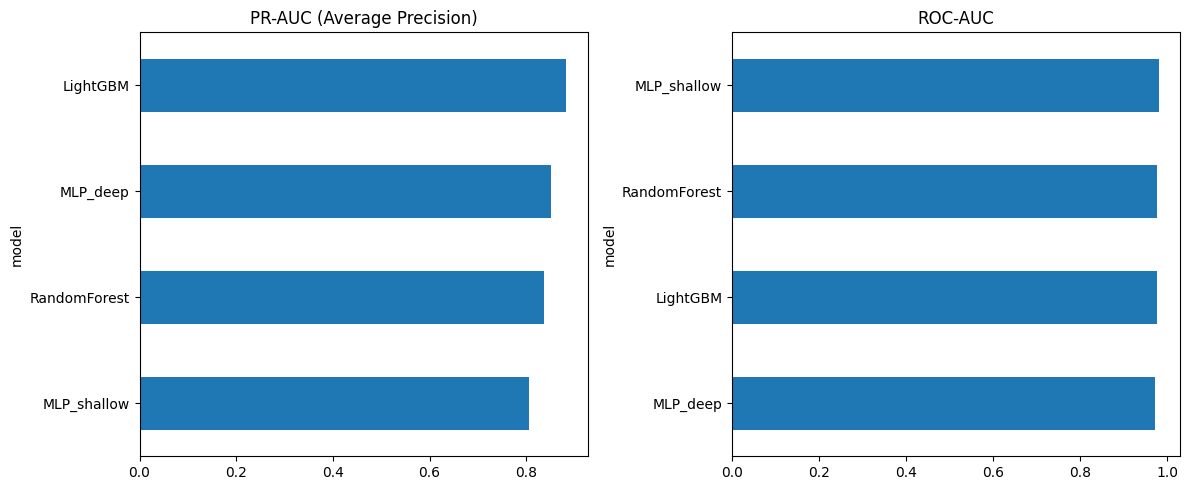

In [22]:
# Plot PR-AUC and ROC-AUC
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
results_df.set_index('model')['pr_auc'].sort_values().plot(kind='barh')
plt.title('PR-AUC (Average Precision)')


plt.subplot(1,2,2)
results_df.set_index('model')['roc_auc'].sort_values().plot(kind='barh')
plt.title('ROC-AUC')
plt.tight_layout()
plt.show()